# Eve Online Order analysis

In [27]:
import json

import pandas as pd

with open("../orders.json") as file:
    data = json.load(file)

orders = pd.DataFrame(data)

orders.head()


,duration,is_buy_order,issued,location_id,min_volume,order_id,price,range,system_id,type_id,volume_remain,volume_total
0,90,False,2019-08-09T20:22:58Z,60005047,1,5482713865,6.50,region,30002506,34,9825753,9825753
1,30,False,2019-08-10T12:30:49Z,60005050,1,5483742553,6.45,region,30002508,34,4785,4785
2,30,False,2019-08-10T12:08:41Z,60005050,1,5483728349,6.45,region,30002508,34,4,154
3,7,False,2019-08-07T17:04:45Z,60005050,1,5481794606,6.50,region,30002508,34,11633409,11633409
4,7,False,2019-08-12T04:00:00Z,60009109,1,5485166194,6.25,region,30002509,34,35554881,35554881


In [28]:
orders.describe()

,duration,location_id,min_volume,order_id,price,system_id,type_id,volume_remain,volume_total
count,108.000000,1.080000e+02,108.000000,1.080000e+02,108.000000,1.080000e+02,108.0,1.080000e+02,1.080000e+02
mean,72.333333,3.818753e+10,1.916667,5.463544e+09,17.361481,3.000438e+07,34.0,3.771189e+07,4.954079e+07
std,32.061856,1.953194e+11,9.526279,6.363991e+07,68.676917,3.904682e+03,0.0,7.909339e+07,8.854614e+07
min,1.000000,6.000112e+07,1.000000,4.856772e+09,0.150000,3.000251e+07,34.0,4.000000e+00,1.540000e+02
25%,90.000000,6.000459e+07,1.000000,5.465496e+09,5.587500,3.000251e+07,34.0,8.949475e+04,1.117745e+05
50%,90.000000,6.000505e+07,1.000000,5.478412e+09,6.500000,3.000254e+07,34.0,4.394820e+06,1.000000e+07
75%,90.000000,6.001479e+07,1.000000,5.483890e+09,6.800000,3.000255e+07,34.0,3.885351e+07,7.675000e+07
max,90.000000,1.030851e+12,100.000000,5.485856e+09,617.000000,3.001255e+07,34.0,5.562458e+08,6.000000e+08


In [24]:
import json

import pandas as pd

with open("../types.json") as file:
    data = json.load(file)

types = pd.DataFrame(data)

Let's see what Type 34 is...

In [5]:
print(types.loc[types["type_id"] == 34]["name"])

30    Tritanium
Name: name, dtype: object


In [6]:
import seaborn as sns
sns.set()

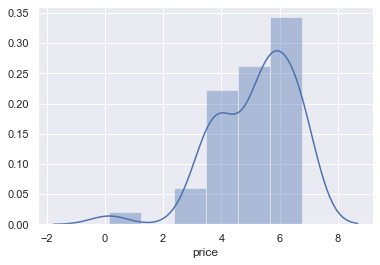

In [17]:
sns.distplot(orders.price)

That's a nice diagram, but we might have some outliers we want to get rid of. We do that by just keeping the once +/- the standard deviation away from the mean.

In [18]:
import numpy as np

o = orders[np.abs(orders.price-orders.price.mean()) <= (3*orders.price.std())]


Plotting the new data frame gives us a little bit more focus.

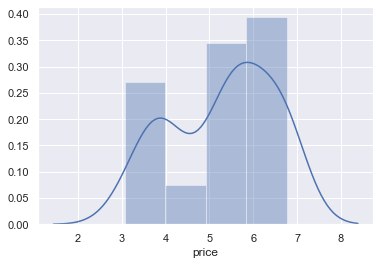

In [19]:
sns.distplot(o.price.dropna())
